In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os

import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
#graph_rel_path = "sample-graphs/sourcecred_sourcecred.json"
infra_rel_path = "infra"

#graph_abs_file_path = os.path.abspath(os.path.join(base_path, graph_rel_path))
infra_abs_path = os.path.abspath(os.path.join(base_path, infra_rel_path))

os. chdir(infra_abs_path)
import page_ranker as pr
import import_graph as ig
import inspect_subgraph as isg
os. chdir(cwd)

In [2]:
N =10

In [3]:
line = nx.path_graph(N, create_using=nx.MultiDiGraph)
edges = line.edges

G = nx.MultiDiGraph()
for e in edges:
    G.add_edge(e[0],e[1])
    G.add_edge(e[1],e[0])
    
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

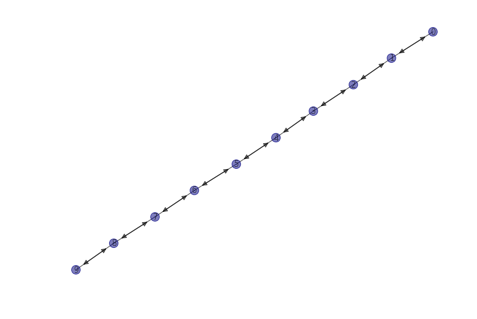

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

In [8]:
alpha = .1
iterations = 25

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= .1

In [9]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         lazy_decay=True,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

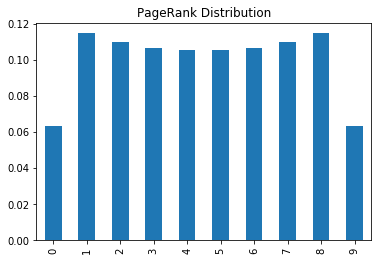

In [10]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

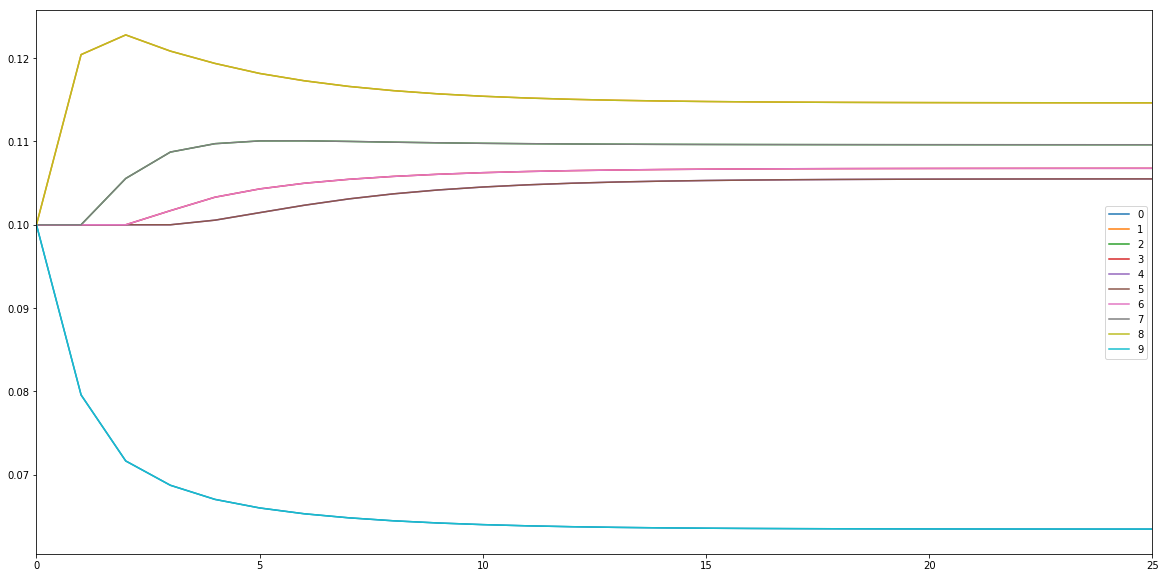

In [11]:
df.plot(figsize=(20,10))

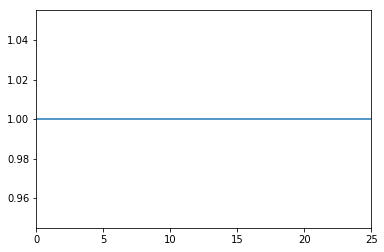

In [12]:
df.sum(axis=1).plot()

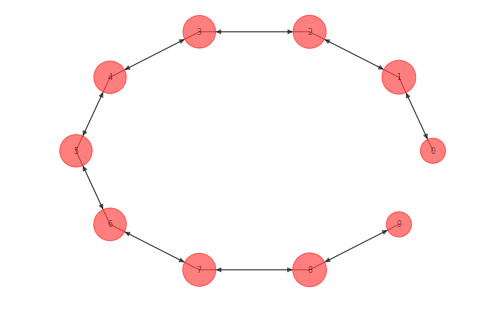

In [13]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_circular(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [14]:
nx.get_node_attributes(G,'self_wt')

{0: 0.1,
 1: 0.1,
 2: 0.1,
 3: 0.1,
 4: 0.1,
 5: 0.1,
 6: 0.1,
 7: 0.1,
 8: 0.1,
 9: 0.1}

In [15]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.5,
 (1, 0, 0): 0.5,
 (1, 2, 0): 0.5,
 (2, 1, 0): 0.5,
 (2, 3, 0): 0.5,
 (3, 2, 0): 0.5,
 (3, 4, 0): 0.5,
 (4, 3, 0): 0.5,
 (4, 5, 0): 0.5,
 (5, 4, 0): 0.5,
 (5, 6, 0): 0.5,
 (6, 5, 0): 0.5,
 (6, 7, 0): 0.5,
 (7, 6, 0): 0.5,
 (7, 8, 0): 0.5,
 (8, 7, 0): 0.5,
 (8, 9, 0): 0.5,
 (9, 8, 0): 0.5}

In [16]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (1, 0, 0): 1,
 (1, 2, 0): 1,
 (2, 1, 0): 1,
 (2, 3, 0): 1,
 (3, 2, 0): 1,
 (3, 4, 0): 1,
 (4, 3, 0): 1,
 (4, 5, 0): 1,
 (5, 4, 0): 1,
 (5, 6, 0): 1,
 (6, 5, 0): 1,
 (6, 7, 0): 1,
 (7, 6, 0): 1,
 (7, 8, 0): 1,
 (8, 7, 0): 1,
 (8, 9, 0): 1,
 (9, 8, 0): 1}

In [17]:
nx.get_node_attributes(G,'total_wt')

{0: 1.6,
 1: 3.1,
 2: 3.1,
 3: 3.1,
 4: 3.1,
 5: 3.1,
 6: 3.1,
 7: 3.1,
 8: 3.1,
 9: 1.6}

In [18]:
all_nbr = {n:list(nx.all_neighbors(G,n)) for n in G.nodes}

In [19]:
all_nbr

{0: [1, 1],
 1: [0, 2, 0, 2],
 2: [1, 3, 1, 3],
 3: [2, 4, 2, 4],
 4: [3, 5, 3, 5],
 5: [4, 6, 4, 6],
 6: [5, 7, 5, 7],
 7: [6, 8, 6, 8],
 8: [7, 9, 7, 9],
 9: [8, 8]}

In [20]:
nbr = {n:list(G.neighbors(n)) for n in G.nodes}

In [21]:
nbr

{0: [1],
 1: [0, 2],
 2: [1, 3],
 3: [2, 4],
 4: [3, 5],
 5: [4, 6],
 6: [5, 7],
 7: [6, 8],
 8: [7, 9],
 9: [8]}

In [22]:
G.edges

OutMultiEdgeView([(0, 1, 0), (1, 0, 0), (1, 2, 0), (2, 1, 0), (2, 3, 0), (3, 2, 0), (3, 4, 0), (4, 3, 0), (4, 5, 0), (5, 4, 0), (5, 6, 0), (6, 5, 0), (6, 7, 0), (7, 6, 0), (7, 8, 0), (8, 7, 0), (8, 9, 0), (9, 8, 0)])